# Section 1: Project Understanding

## Asian Population 2020
#### This project aims to provide a good analysis on a few questions like the total population of Asia in 2020, the Highest density country, etc. The database provided by the Worldometer is used for the reference

#### Question 1:
#### What was the total population of Asia in 2020?

#### Question 2:
#### Which country has the highest Population Density?

#### Question 3:
#### Identifying top 5 countries with highest percentage Urban population?

#### Question 4: 
#### Identifying top 5 countries with largest median age? 

#### The results here are used to write the mentioned blog.
#### https://asiapopulation.blogspot.com/2021/12/asia-population-2020.html

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Section 2: Data Understanding

### Gather

In [2]:
#load data
df = pd.read_csv('AsiaPopulation2020.csv')
df.head()

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50
1,Armenia,2963243,0.19,5512,104,28470,-4998,1.8,35,63.0,0.04
2,Azerbaijan,10139177,0.91,91459,123,82658,1200,2.1,32,56.0,0.13
3,Bahrain,1701575,3.68,60403,2239,760,47800,2.0,32,89.0,0.02
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11


In [3]:
df.shape

(51, 11)

In [4]:
#investigate the data set
df.describe()

,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare
count,5.100000e+01,51.000000,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,47.000000,51.000000
mean,9.100107e+07,1.267843,7.781094e+05,997.647059,6.084928e+05,-33904.235294,2.331373,30.862745,58.446809,1.168039
std,2.748929e+08,0.822083,2.111831e+06,3321.752241,1.430488e+06,135241.664715,0.805603,6.785336,22.701090,3.526507
min,4.374790e+05,-0.440000,-3.838400e+05,2.000000,3.000000e+01,-532687.000000,1.100000,18.000000,18.000000,0.010000
25%,5.104020e+06,0.805000,4.749550e+04,73.500000,2.505500e+04,-30006.000000,1.900000,26.000000,37.000000,0.070000
50%,1.671896e+07,1.300000,1.198730e+05,123.000000,1.433500e+05,-4000.000000,2.100000,30.000000,58.000000,0.210000
75%,4.574584e+07,1.710000,5.367205e+05,357.500000,4.904100e+05,23236.000000,2.800000,34.500000,78.500000,0.590000
max,1.439324e+09,3.680000,1.358663e+07,21645.000000,9.388211e+06,283922.000000,4.600000,48.000000,96.000000,18.470000


In [5]:
#checking the data types
df.dtypes

Country          object
Population        int64
YearlyChange    float64
NetChange         int64
Density           int64
LandArea          int64
Migrants          int64
FertRate        float64
MedAge            int64
UrbanPop        float64
WorldShare      float64
dtype: object

# Section 3: Data Preparation

In [6]:
#check for null values
df.isna().sum()

Country         0
Population      0
YearlyChange    0
NetChange       0
Density         0
LandArea        0
Migrants        0
FertRate        0
MedAge          0
UrbanPop        4
WorldShare      0
dtype: int64

In [7]:
#replace missing values with mean()
df['UrbanPop'].fillna(float(df['UrbanPop'].mean()), inplace=True)

In [8]:
#check for the null values to be sure
df.isna().sum()

Country         0
Population      0
YearlyChange    0
NetChange       0
Density         0
LandArea        0
Migrants        0
FertRate        0
MedAge          0
UrbanPop        0
WorldShare      0
dtype: int64

# Section 4: Evaluation

### Question 1: What was the totAL population of Asia in 2020?

In [10]:
#total population
df['Population'].sum()

4641054775

# Question 2: Which country has the highest Population Density?

In [11]:
#highest density country
highest_density_country = (df['Density'].sort_values(ascending = False))[:6]
countries = list(df['Country'][highest_density_country.index])

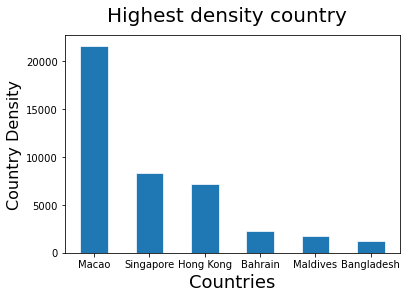

In [12]:
# plotting above results
fig, ax = plt.subplots()
fig.suptitle('Highest density country', fontsize=20)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Country Density', fontsize=16)
ax.bar(countries, highest_density_country, width=.5, edgecolor="white", linewidth=0.7)
plt.show()
fig.savefig('density.jpg', bbox_inches='tight')

### Question 3: Identifying top 5 countries with highest percentage Urban population?

In [13]:
#top 5 highest % Urban population
highest_urban_population_percentage = (df['UrbanPop']/df['Population']).sort_values(ascending = False)[:6]
country_urban = list(df['Country'][highest_urban_population_percentage.index])

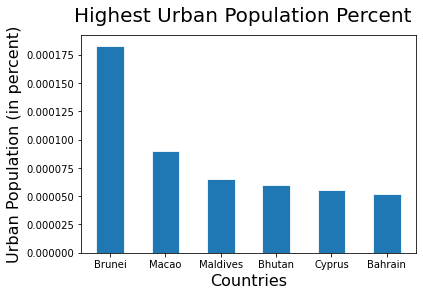

In [14]:
# plotting above results
fig, ax = plt.subplots()
fig.suptitle('Highest Urban Population Percent', fontsize=20)
plt.xlabel('Countries', fontsize=16)
plt.ylabel('Urban Population (in percent)', fontsize=16)
ax.bar(country_urban, highest_urban_population_percentage, width=.5, edgecolor="white", linewidth=0.8)
plt.show()
fig.savefig('urban.jpg', bbox_inches='tight')

### Question 4: Identifying top 5 countries with largest median age?

In [15]:
# highest median age
top_10_median_age = (df['MedAge']).sort_values(ascending = False)[:5]
country_med = list(df['Country'][top_10_median_age.index])

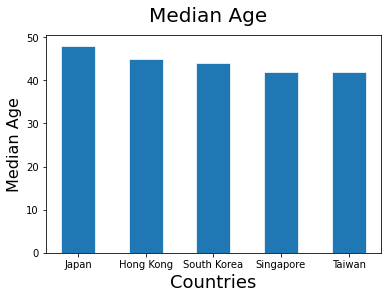

In [16]:
# plotting above results
fig, ax = plt.subplots()
fig.suptitle('Median Age', fontsize=20)
plt.xlabel('Countries', fontsize=18)
plt.ylabel('Median Age', fontsize=16)
ax.bar(country_med, top_10_median_age, width=.5, edgecolor="white", linewidth=0.7)
plt.show()
fig.savefig('medage.jpg', bbox_inches='tight')